## Final Project


Student Name : Prossy Nansubuga
Student pace: REMOTE 
Scheduled project review date/time: 
Instructor name: ASHA DEEN


## Overview

This project aims to employ exploratory data analysis to extract valuable information for Microsoft, aiming to establish a new movie studio. 
By looking at information from IMDB and Box Office Mojo, am going to figure out which movie genres are most successful.
The two determinants will be: 
1.How much money the movies make 
2.What people think of them. 
From this analysis, Microsoft should focus on genres like Sci-Fi, adventure, animation, and action because they make the most money.

## Business Problem

Microsoft wants to enter the world of video content production by setting up its own movie studio. However, their lack of experience in this area presents a challenge. This analysis aims to explore trends in successful movies at the box office to help Microsoft's new movie studio head make informed decisions about which genres and themes to focus on.

Questions :<br>
Which genre of movies have the highest gross income?<br>
Which genre of movies have a higher average rating?<br>
What is the relationship between the average rating and the gross income?<br>
What is the domestic gross and foreign gross income by start year of the movies?<br>

### Importing Modules and Relevant Datasets

In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

# Box Office Mojo dataset
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')



### Dataset understanding

The first step is to take a glimpse at your data to understand what variables you’re working with andhow the values are structured based on the column they’re in.This will give a good idea of what data types you might be dealing with, what columns you need to perform transformations or cleaning, and other data you might be able to extract.,<br>
<br>
We will define a function `df_inpsect` to help inspect our datasets.<br>
It returns : <br>
- the first 5 entries of the dataset <br> 
- dataset information <br>
- total number of null values per column in a dataframe <br> 



In [21]:

# Inspect the IMDb title basics dataset
df_inspect(imdb_title_basics)

# Inspect the IMDb title ratings dataset
df_inspect(imdb_title_ratings)

# Inspect the Box Office Mojo movie gross dataset
df_inspect(bom_movie_gross)


First 5 entries:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None



Total number of null values per column:


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

First 5 entries:


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None



Total number of null values per column:


tconst           0
averagerating    0
numvotes         0
dtype: int64

First 5 entries:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None



Total number of null values per column:


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [4]:
# Display the first 5 entries of the dataset
# Display the first 5 entries of the IMDb title basics dataset
print("First 5 entries of IMDb title basics dataset:")
print(imdb_title_basics.head())

# Display the first 5 entries of the IMDb title ratings dataset
print("\nFirst 5 entries of IMDb title ratings dataset:")
print(imdb_title_ratings.head())

# Display the first 5 entries of the Box Office Mojo movie gross dataset
print("\nFirst 5 entries of Box Office Mojo movie gross dataset:")
print(bom_movie_gross.head())


First 5 entries of IMDb title basics dataset:
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

First 5 entries of IMDb title ratings dataset:
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       

#### Movie_gross dataframe

From the above output, DataFrame `bom_movie` contains 3387 rows and 5 columns with the following information about movies:
> - title : The title of the movie <br>
> - studio : The studio that produced the movie<br>
> - domestic_gross : The domestic gross revenue of the movie in <br>
> - foreign_gross : The foreign gross revenue of the movie in dollars<br>
> - year : The year in which the movie was released<br>

In [5]:
df_inspect(imdb_title_basics)

First 5 entries:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None



Total number of null values per column:


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

From the above output, DataFrame `imdb_title_basics` contains 146144 rows and 6 columns.<br>
<br>
 [Imdb site](https://developer.imdb.com/non-commercial-datasets/) also reveals additional info about the title of each columns:<br>

> - tconst (string) - alphanumeric unique identifier of the title<br>
> - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release<br>
> - originalTitle (string) - original title, in the original language<br>
> - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year<br>
> - runtimeMinutes – primary runtime of the title(duration), in minutes<br>
> - genres (string array) – includes up to three genres associated with the title<br>

In [6]:


# Call the df_inspect function with the title_ratings DataFrame
df_inspect(imdb_title_ratings)


First 5 entries:


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None



Total number of null values per column:


tconst           0
averagerating    0
numvotes         0
dtype: int64

From the above output, DataFrame `imdb_title_basics` contains 73856 rows and 3 columns:<br>
> - tconst (string) - alphanumeric unique identifier of the title
> - averageRating – weighted average of all the individual user ratings
> - numVotes - number of votes the title has received 

### Data Cleaning

The next step is to clean our data so that we can deal with quality data to enhance analysis.
Steps:
 - Check for missing values
 - Check for duplicate values
 - Amend data types 
 - Fix error values

#### Check for missing values

We create a simple loop to create a list of the entries with missing values for each column of a dataset.

In [62]:
# Check for missing values in the IMDb title basics dataset
missing_values_imdb_title_basics = imdb_title_basics.isnull().sum()
print("Missing values in IMDb title basics dataset:")
print(missing_values_imdb_title_basics)

# Check for missing values in the IMDb title ratings dataset
missing_values_imdb_title_ratings = imdb_title_ratings.isnull().sum()
print("\nMissing values in IMDb title ratings dataset:")
print(missing_values_imdb_title_ratings)

# Check for missing values in the Box Office Mojo movie gross dataset
missing_values_bom_movie_gross = bom_movie_gross.isnull().sum()
print("\nMissing values in Box Office Mojo movie gross dataset:")
print(missing_values_bom_movie_gross)


Missing values in IMDb title basics dataset:
tconst             0
primary_title      1
original_title     3
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Missing values in IMDb title ratings dataset:
tconst           0
averagerating    0
numvotes         0
dtype: int64

Missing values in Box Office Mojo movie gross dataset:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


All datasets contain missing values except the `imdb_rating` . This means we will deal with the missing values of the rest datasets.

For `Movie_gross` dataset , we can conclude movie entries with null values did not have domestic gross neither foreign income for that year, hence replacing the value with 0. This occurs for `domestic_gross` and `foreign_gross` .

Studio column contains 5 missing values, we replace this with `None`

In [8]:
# Replace missing values in 'foreign_gross' and 'domestic_gross' columns with 0
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross['domestic_gross'].fillna(0, inplace=True)

# Verify the changes
print("Missing values after replacement:")
print(bom_movie_gross[['foreign_gross', 'domestic_gross']].isnull().sum())


Missing values after replacement:
foreign_gross     0
domestic_gross    0
dtype: int64


Lastly, for `imdb_title_df` , we have  missing values in some columns.<br>
 - The values in `original_title` to be replaced with `primary_title`. 
- `runtime_minutes` are vital for the analysis , the missing values to be replaced with median value of the column.
- Missing values in the genres column will be dropped; genre of each entry is very crucial for analysis .

In [9]:
# Replace missing values in 'original_title' with values from 'primary_title'
imdb_title_basics['original_title'].fillna(imdb_title_basics['primary_title'], inplace=True)

# Verify the changes
print("Missing values after replacement:")
print(imdb_title_basics['original_title'].isnull().sum())


Missing values after replacement:
1


###  Check for duplicate values

We'll use the below code to filter out duplicate for each dataset

In [11]:
# Calculate the median value of the 'runtime_minutes' column
median_runtime = imdb_title_basics['runtime_minutes'].median()

# Replace missing values in 'runtime_minutes' with the median value
imdb_title_basics['runtime_minutes'].fillna(median_runtime, inplace=True)

# Verify the changes
print("Missing values after replacement:")
print(imdb_title_basics['runtime_minutes'].isnull().sum())


Missing values after replacement:
0


In [12]:



# Check duplicate records for imdb_ratings dataframe
duplicate_records = imdb_title_ratings.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_records.sum()

# Display the result
if num_duplicates == 0:
    print("No duplicate records found in the IMDb title ratings dataset.")
else:
    print(f"Number of duplicate records found: {num_duplicates}")
    print("Duplicate records:")
    print(imdb_ratings[duplicate_records].head())  # Displaying the first few duplicate records



No duplicate records found in the IMDb title ratings dataset.


From the above output,Imdb_ratings doesn't have any duplicates because `tconst` is a unique identifier value.

In [13]:
#display all duplicate records for imdb_title_basics dataframe using 'primary_title','start_year' and 'genres' columns
imdb_title_basics[imdb_title_basics.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])[25:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
51820,tt3072686,5 People,5 People,2013,87.0,Thriller
55539,tt3252324,5 People,5 People,2013,87.0,"Comedy,Drama,Thriller"
46602,tt2771990,7 Days,7 Days,2015,87.0,Sci-Fi
88065,tt5112592,7 Days,Nanoka,2015,110.0,Drama
104504,tt6111436,88,88,2016,102.0,Documentary
105408,tt6160528,88,88,2016,103.0,Documentary
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
31052,tt2180277,90 Minutes,90 minutter,2012,88.0,Drama
51474,tt3054786,90 Minutes,90 Minutes,2012,94.0,Thriller


`imdb_title_basics` has duplicate records based on the `primary_title` and the `start_year`. Some of the duplicate records have slightly different genres while others have missing values in either the runtime_minutes or genre columns. <br>
The duplicate records will be dropped, while keeping the entry with the least number of missing values.

In [14]:
#assign a different variable name to a copy of the imdb_title_basics dataframe
imdb_title_df = imdb_title_basics.copy()

#assign a new column, 'missing', to the sum of missing values in each row sort the dataframe by values of the 'primary_title' &'missing'
imdb_title_df = imdb_title_df.assign(missing=imdb_title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=True)

# preview of duplicated records
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])][:20]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",0
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
20394,tt1855110,180,180,2011,121.0,"Drama,Romance",0
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",0
65431,tt3735338,1989,1989,2014,54.0,Documentary,0
72121,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",0
50212,tt2979366,21 Days,21 Days,2014,89.0,"Horror,Thriller",0
75495,tt4312624,21 Days,21 den,2014,70.0,Documentary,0


Then, we drop duplicates to obatin values entries with least missing values; below code :

In [15]:
imdb_title_df = imdb_title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')

Above, if two rows have the same '`primary_title`' and '`start_year`', the keep='first' argument ensures that only the first occurrence of the duplicate is kept, and the subsequent duplicates are dropped. After removing duplicates, we drop the column named 'missing' from the DataFrame beacause it becomes redundant after removing duplicates

To check for any more duplicates:

In [16]:
#recheck for duplicates
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


### Amend data types

Each column should have correspondingly valid data types so that analysis can occur without any hitches. The function `df_inspect` contains a method `.info` that provides information for each dataset passed through. <br>

We can find the dataype for each column by calling `.dtypes` . As below :

In [61]:
#check the data type of each column 
print(f'movie gross data types: \n {bom_movie_gross.dtypes} \n ---')
print(f'\n imdb title  data types: \n {imdb_title_df.dtypes} \n ---')
print(f'\n imdb ratings data types: \n {imdb_ratings.dtypes} \n ---')

movie gross data types: 
 title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object 
 ---

 imdb title  data types: 
 tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object 
 ---


NameError: name 'imdb_ratings' is not defined

Notice that column foreign_gross has object values instead of float values to represent number values. So we convert to float values :


In [28]:
import pandas as pd

# Load the dataset into a DataFrame named movie_gross
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

# Convert the data type of the foreign_gross column from object to float
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(",","").astype(float)


In [29]:
# Check for duplicate records
duplicate_records = bom_movie_gross.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_records.sum()

# Display the result
if num_duplicates == 0:
    print("No duplicate records found in the BOM movie gross dataset.")
else:
    print(f"Number of duplicate records found: {num_duplicates}")
    print("Duplicate records:")
    print(bom_movie_gross[duplicate_records])


No duplicate records found in the BOM movie gross dataset.


In [60]:
import pandas as pd

try:
    # Load the dataset into a DataFrame named bom_movie_gross
    bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

    # Check if 'foreign_gross' column exists in the DataFrame
    if 'foreign_gross' in bom_movie_gross.columns:
        # Convert the data type of the foreign_gross column from object to float
        bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(",","").astype(float)
        print("Conversion successful!")
    else:
        print("Error: 'foreign_gross' column not found in the DataFrame.")
except Exception as e:
    print("An error occurred:", e)


Conversion successful!


We call out the type of `foreign_gross` to confirm :

In [31]:
bom_movie_gross['foreign_gross'].dtype

dtype('float64')

### Amend error values

In the box office dataset, we notice there are movie that have pre-planned release year(under `start_year` column). So, we align data upto year of current record(2022):

In [32]:
#check for years greater than 2022 in imdb_title_df
imdb_title_df[imdb_title_df['start_year'] > 2022]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama
16337,tt1757678,Avatar 3,Avatar 3,2023,87.0,"Action,Adventure,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,87.0,"Action,Adventure,Fantasy"
96592,tt5637536,Avatar 5,Avatar 5,2027,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,87.0,"Adventure,Family,Fantasy"
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,87.0,Action
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,87.0,Fantasy
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,87.0,"Adventure,Drama,Fantasy"


In [34]:
# drop records with start_year more than 2022
imdb_title_df = imdb_title_df[imdb_title_df['start_year'] <= 2022]

Then we check to confirm there's no records with start year beyond 2022

In [35]:
#recheck
imdb_title_df[imdb_title_df['start_year'] > 2022]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [36]:
import pandas as pd

# Load the dataset into a DataFrame named bom_movie_gross
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

# Filter the DataFrame to include only years greater than 2022
years_greater_than_2022 = bom_movie_gross[bom_movie_gross['year'] > 2022]

# Display the filtered DataFrame
print("Movies with years greater than 2022:")
print(years_greater_than_2022)



Movies with years greater than 2022:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


And we are done with cleaning the data.

## Merging of dataframes

I merge the `imdb_title_df` with `imdb_rating` to add more entries and give details within a row. The column `tconst` is our common column, therefore we use it to merge.

In [37]:
import pandas as pd

print("Value of imdb_title_df:", imdb_title_df)
print("Value of imdb_ratings:", imdb_ratings)

if imdb_title_df is not None and imdb_ratings is not None:
    joined_imdb_df = imdb_title_df.merge(imdb_ratings, on='tconst', how='inner')

    # Display the first 10 rows of the merged DataFrame
    print("Merged DataFrame:")
    print(joined_imdb_df.head(10))
else:
    print("Error: One or both DataFrames is None.")


Value of imdb_title_df:            tconst              primary_title             original_title  \
13871   tt1699720      !Women Art Revolution       Women Art Revolution   
37039   tt2346170           #1 Serial Killer           #1 Serial Killer   
52892   tt3120962                         #5                         #5   
131857  tt8219776                         #5                         #5   
77936   tt4470336                 #50Fathers                 #50Fathers   
...           ...                        ...                        ...   
61401   tt3547074  è solo questione di tempo  è solo questione di tempo   
139058  tt8976950     élèctions piege à cons     élèctions piege à cons   
102502  tt5997078                     împetu                     împetu   
76481   tt4373884               Šiška Deluxe               Siska Deluxe   
98772   tt5774076                        NaN                        NaN   

        start_year  runtime_minutes                    genres  
13871      

NameError: name 'imdb_ratings' is not defined

In [38]:
#check the column names of both DataFrames to identify the correct column for merging
print("bom_movie_gross columns:", bom_movie_gross.columns)
print("imdb_title_basics columns:", imdb_title_basics.columns)


bom_movie_gross columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
imdb_title_basics columns: Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


### Total Gross Income

From looking at the datasets, it is deduced that the total gross  income column can be added to the dataframe. The total gross income can be calculated by finding the sum of the domestic gross income and the foreign gross income for each movie. <br>

For movies without either of foreign or domestic gross, the total gross is null.

In [39]:
import pandas as pd

# Load the dataset
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

# Convert 'domestic_gross' and 'foreign_gross' columns to numeric, coercing errors to NaN
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

# Calculate total gross income
bom_movie_gross['total_gross_income'] = bom_movie_gross['domestic_gross'].fillna(0) + bom_movie_gross['foreign_gross'].fillna(0)

# Display the DataFrame with the new column
print(bom_movie_gross.head())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  total_gross_income  
0    652000000.0  2010        1.067000e+09  
1    691300000.0  2010        1.025500e+09  
2    664300000.0  2010        9.603000e+08  
3    535700000.0  2010        8.283000e+08  
4    513900000.0  2010        7.526000e+08  


### Separate the genre categories

In [40]:
#check the column names to identify the correct column containing genre information
print(imdb_title_basics.columns)


Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [41]:
import pandas as pd

# Load the dataset and make a copy
movies = imdb_title_basics.copy()

# Split the genre categories and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies = movies.explode('genres')

# Display the DataFrame with separated genre categories
print(movies.head())


      tconst                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes     genres  
0            175.0     Action  
0            175.0      Crime  
0            175.0      Drama  
1            114.0  Biography  
1            114.0      Drama  


The genre column has multiple categories in a single row. The categories can be separated so that there is one category in each row. <br>
Method .`explode` is used to transform each element of a list-like to a row, replicating index values.

In [42]:
import pandas as pd

# Load the DataFrame (replace 'filename.csv' with the actual file path)
movies_df = pd.read_csv('imdb.title.basics.csv.gz')


In [43]:
# Make a copy of the DataFrame
movies = movies_df.copy()

# Split the genre categories into a list, around the comma separator
movies['genres'] = movies['genres'].str.split(',')

# Transform each element in the genres list to a row
movies = movies.explode('genres')

# Display the DataFrame with separated genre categories
print(movies.head())


      tconst                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes     genres  
0            175.0     Action  
0            175.0      Crime  
0            175.0      Drama  
1            114.0  Biography  
1            114.0      Drama  


In [44]:
#preview the first 10 rows of the movies dataframe 
movies.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama


In [58]:
#reset index
movies = movies.reset_index(drop=True)

In [46]:
#value counts of the genres column in the new dataset after separating the genres
movies['genres'].value_counts()

genres
Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: count, dtype: int64

In [47]:
#value counts of the genres column in the dataset before separating the genres
movies_df['genres'].value_counts()

genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: count, Length: 1085, dtype: int64

## Data Visualization

### Number of movies per genre

Here, we plot number of movies against genre.

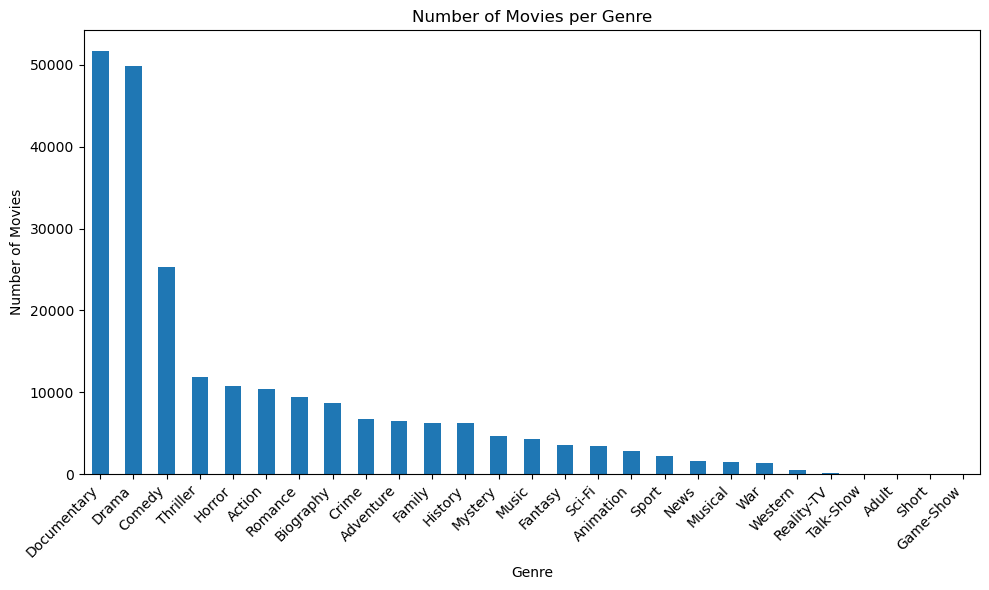

In [57]:
#countplot showing the number of movies per genre
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of movies per genre
genre_counts = movies['genres'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







The dataset shows that Documentary,Drama, Comedy, and Thriller are the most prevalent genres among the released movies. Documentary and Drama, in particular, stand out as the largest film genres due to their broad and inclusive nature, often leading to movies being classified under multiple genres.<br>

On the other hand, the genres with the fewest movies are Game-show,Short,Adult,Talkshow and Reality-TV. These genres are more specialized, focusing on specific themes or storylines in the movies.

### Distribution of the movies' average rating

In [49]:
import pandas as pd

# Load the dataset
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')




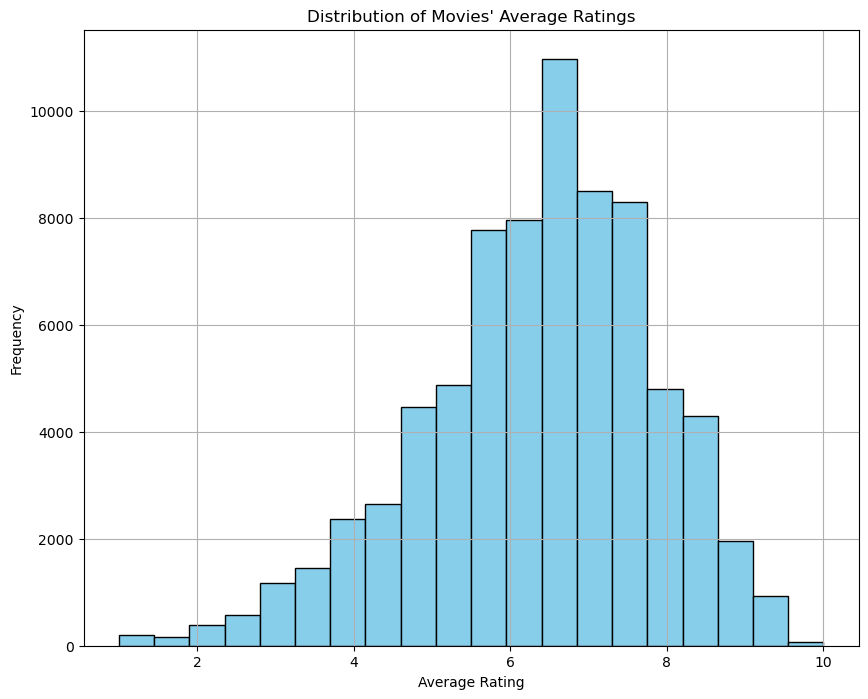

In [50]:
#histogram showing the average rating distribution
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 8))
plt.hist(imdb_title_ratings['averagerating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movies\' Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



The majority of movies have an approximate average rating of 6, and the overall distribution tends to be negatively skewed. A small number of movies receive ratings below 4.<br>
 After comprehending this rating distribution, it becomes crucial to examine the average ratings for each genre.

### Genre of movies with the highest average rating

In [51]:
import pandas as pd

# Merge the DataFrames containing movie ratings and genre information
merged_df = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst', how='inner')

# Calculate the average rating for each genre
genre_avg_rating = merged_df.groupby('genres')['averagerating'].mean().reset_index()

# Find the genre with the highest average rating
highest_avg_rating_genre = genre_avg_rating.loc[genre_avg_rating['averagerating'].idxmax()]

print("Genre with the highest average rating:", highest_avg_rating_genre['genres'])
print("Average rating:", highest_avg_rating_genre['averagerating'])


Genre with the highest average rating: Comedy,Documentary,Fantasy
Average rating: 9.4


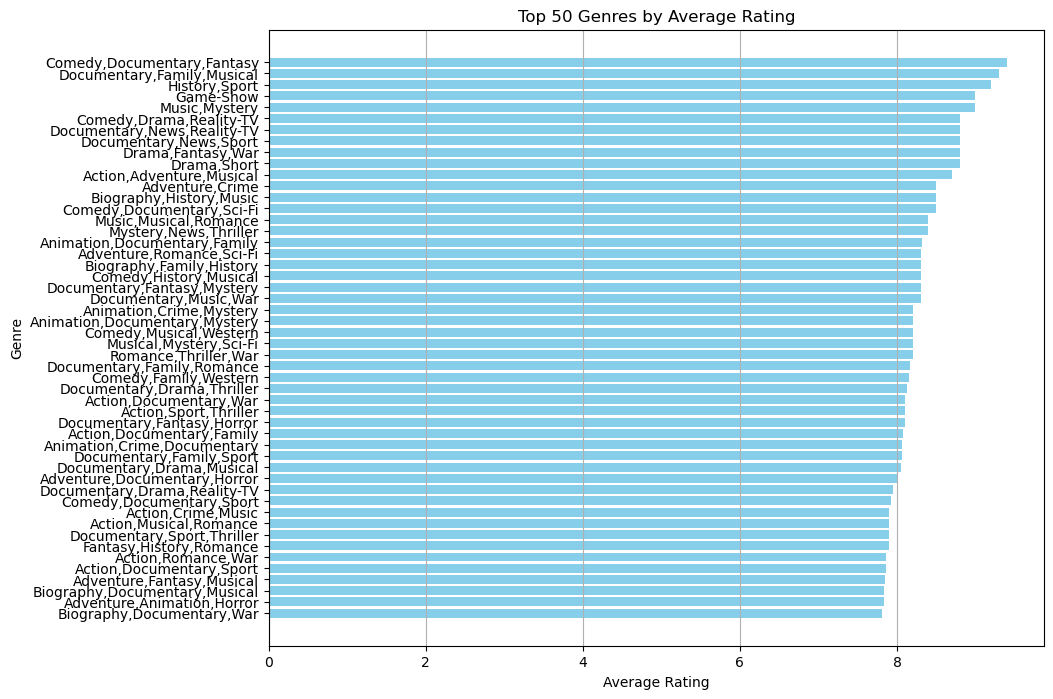

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the DataFrames containing movie ratings and genre information
merged_df = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst', how='inner')

# Calculate the average rating for each genre
genre_avg_rating = merged_df.groupby('genres')['averagerating'].mean().reset_index()

# Sorting the genres by average rating and selecting the top 50
top_genres = genre_avg_rating.nlargest(50, 'averagerating')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_genres['genres'], top_genres['averagerating'], color='skyblue')
plt.title('Top 50 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated genre at the top
plt.grid(axis='x')  # Add grid lines for better visualization
plt.show()




The bars representing the average ratings show minimal variation in height.<br>
Comedy,Documentary, and Fantasy have the highest average ratings, while Biography,Documentary.War genres have the lowest average ratings.

### Total gross income by genre 

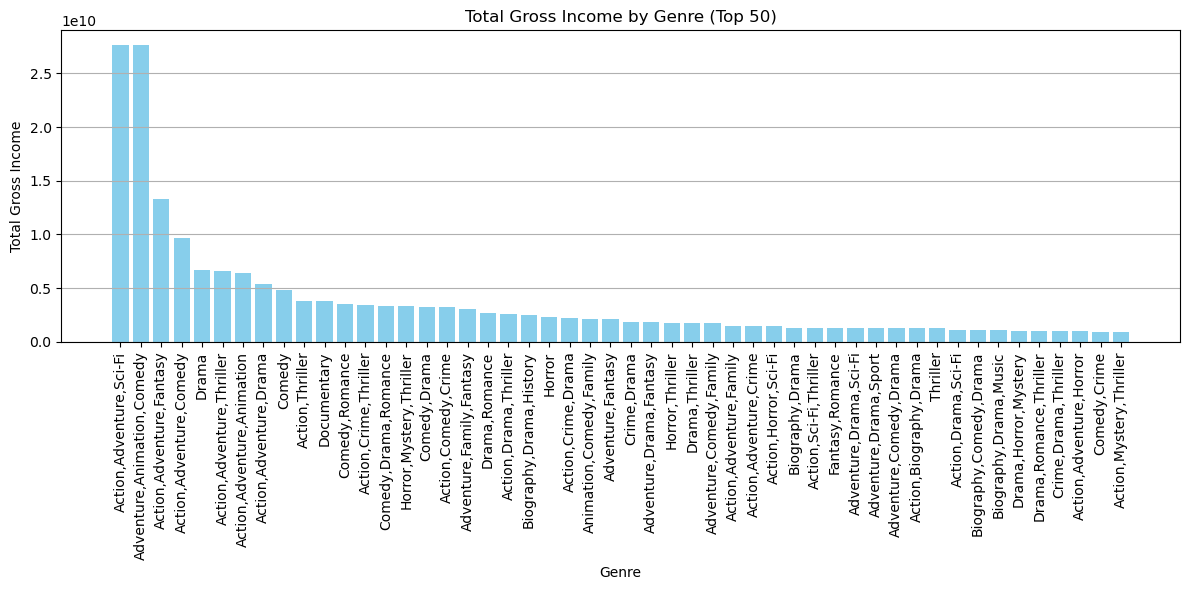

In [53]:
#bar graph showing the total gross income by genre

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and merged the necessary datasets

# Merge the DataFrames containing movie ratings and genre information
merged_df = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst', how='inner')

# Merge with bom_movie_gross to get gross income
merged_df = pd.merge(merged_df, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')

# Calculate the total gross income for each genre
genre_total_gross = merged_df.groupby('genres')['total_gross_income'].sum().reset_index()

# Sorting the genres by total gross income and selecting the top 50
top_50_genres = genre_total_gross.nlargest(50, 'total_gross_income')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_50_genres['genres'], top_50_genres['total_gross_income'], color='skyblue')
plt.title('Total Gross Income by Genre (Top 50)')
plt.xlabel('Genre')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Box office mojo primarily monitors theatrical box office earnings, excluding other revenue sources like home entertainment sales, rentals, television rights, and product placement fees.<br>

The genres that generate the highest income are Sci-Fi, adventure, animation, and action, whereas the genres with the lowest income are Action,Mystery and Thriller.<br>

To explore the potential relationship between the average rating and gross income, various factors will be examined as they can influence a movie's overall earnings.<br>

### Relationship between the average rating and the gross income

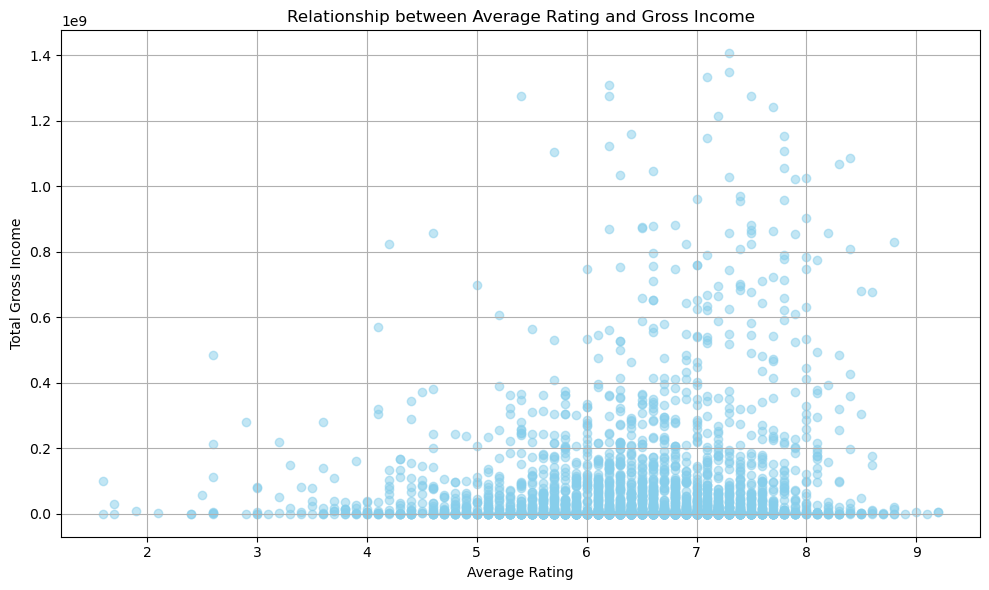

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the DataFrames containing movie ratings and genre information
merged_df = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst', how='inner')

# Merge with bom_movie_gross to get gross income
merged_df = pd.merge(merged_df, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['averagerating'], merged_df['total_gross_income'], color='skyblue', alpha=0.5)
plt.title('Relationship between Average Rating and Gross Income')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Income')
plt.grid(True)
plt.tight_layout()
plt.show()



The relationship between the total gross income and the average rating is not evident. However, it appears that movies with a low average rating, specifically those below 4, tend to have a correspondingly low total gross income.

### Gross income by start year

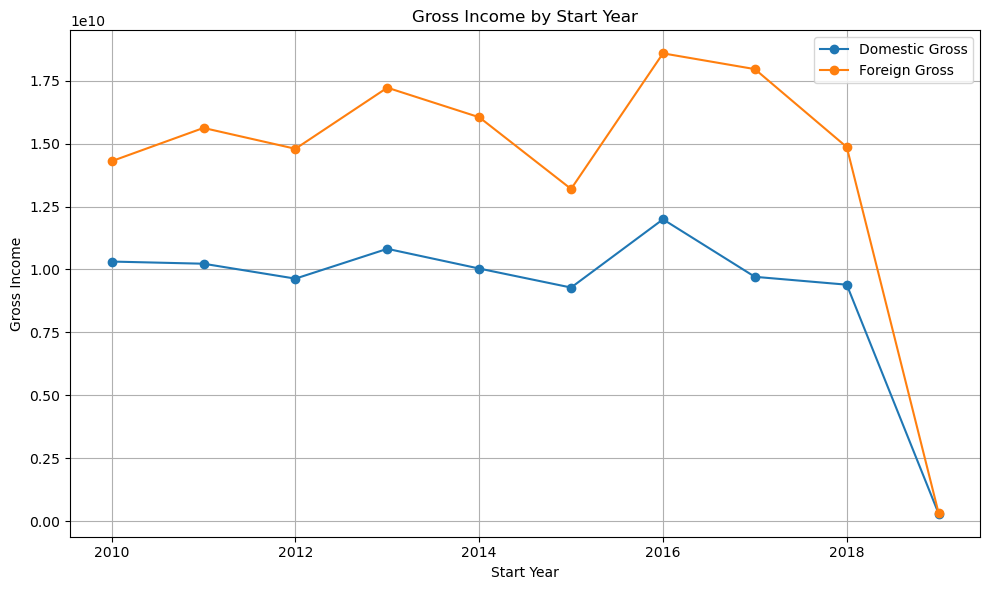

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and merged the necessary datasets

# Merge the DataFrames containing movie ratings and genre information
merged_df = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst', how='inner')

# Merge with bom_movie_gross to get gross income
merged_df = pd.merge(merged_df, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')

# Group by start year and calculate the total domestic gross and foreign gross income
gross_income_by_year = merged_df.groupby('start_year')[['domestic_gross', 'foreign_gross']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gross_income_by_year.index, gross_income_by_year['domestic_gross'], marker='o', label='Domestic Gross')
plt.plot(gross_income_by_year.index, gross_income_by_year['foreign_gross'], marker='o', label='Foreign Gross')
plt.title('Gross Income by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Gross Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We notice a trend: it is common for movies to achieve higher foreign gross income compared to their domestic gross income upon release.<br>

In 2016, movies experienced their peak foreign gross and domestic gross income. However, these incomes significantly declined for movies released in 2019. This decline could be attributed to the increasing popularity of streaming services, with many people opting to use platforms like Netflix instead of going to theaters.<br>

For example, Netflix witnessed remarkable global growth from 2019 onwards. In just the first three months of that year, the streaming video company added an impressive 9.6 million paid subscribers.

## Conclusions and recommendations


In closing, this analysis offers valuable insights for Microsoft's endeavor to establish a new movie studio. I observed that while genres like Comedy, Documentary, and Fantasy boast high average ratings, it's the genres of Sci-Fi, Adventure, Animation, and Action that demonstrate the greatest income-generating potential. Additionally, the decline in theatrical gross income, potentially influenced by the rise of streaming services like Netflix, underscores the importance of adapting to evolving industry trends. As we move forward, we recommend a strategy that balances audience satisfaction with commercial success. This entails diversifying the genre portfolio to include lucrative genres while prioritizing quality content creation. Furthermore, leveraging strategic partnerships with streaming platforms and remaining adaptable to changing consumer preferences will be key in maximizing revenue potential and establishing a strong foothold in the dynamic entertainment landscape. With these insights in mind, Microsoft is poised to embark on an exciting journey in the world of filmmaking, capturing the hearts and minds of audiences worldwide.

Recommendations Microsoft should consider:
-Diversify Genre Portfolio: While high ratings are important for audience satisfaction, prioritize genres such as Sci-Fi, Adventure, Animation, and Action that have proven to be lucrative in terms of income generation.
-Leverage Streaming Platforms: Recognize the growing trend of streaming services and consider strategic partnerships or distribution deals with platforms like Netflix to reach a wider audience and maximize revenue potential.
-Focus on Quality Content: While considering commercial success, prioritize creating high-quality content that resonates with the target audience, as reflected in genres with high average ratings like Comedy and Fantasy.
-Adapt to Changing Trends: Stay agile and adaptable to evolving consumer preferences and industry trends, including exploring opportunities in streaming, digital distribution, and innovative marketing strategies.